In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import plotly.express as px
!pip install xgboost

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [5]:
dataset.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1
5,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.245817,1,20013,4930,182,1,2,1,14379,0,1,0,0,0,1
6,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,14,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.167157,0,12301,6344,-1,1,2,1,1762,1,0,0,0,0,1
7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,29,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [6]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

In [7]:
dataset.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

Total phishing URL 30647
Total legit URL 27998


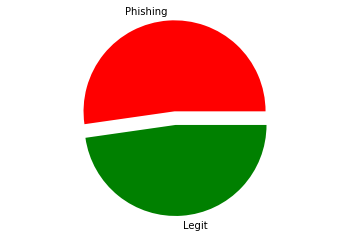

In [8]:
from matplotlib import style

phishing = (dataset['phishing'] == 1).sum() 

legit = (dataset['phishing'] == 0).sum()
print(f"Total phishing URL",phishing)
print(f"Total legit URL",legit)
p = [phishing, legit]
plt.pie(p,
       labels = ['Phishing', 'Legit'], 
       colors = ['red', 'green'],  
       explode = (0.15, 0),
       startangle = 0) 
plt.axis('equal') 
plt.show()


In [9]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(dataset)
var_thres.get_support()
constant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

No of columns with 0 variance: 13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

In [10]:
dataset = dataset.drop(constant_columns,axis=1)
dataset.shape

(58645, 99)

In [11]:
#length of dataset before dropping duplicate rows
lengthbeforedropping=len(dataset)
lengthbeforedropping

58645

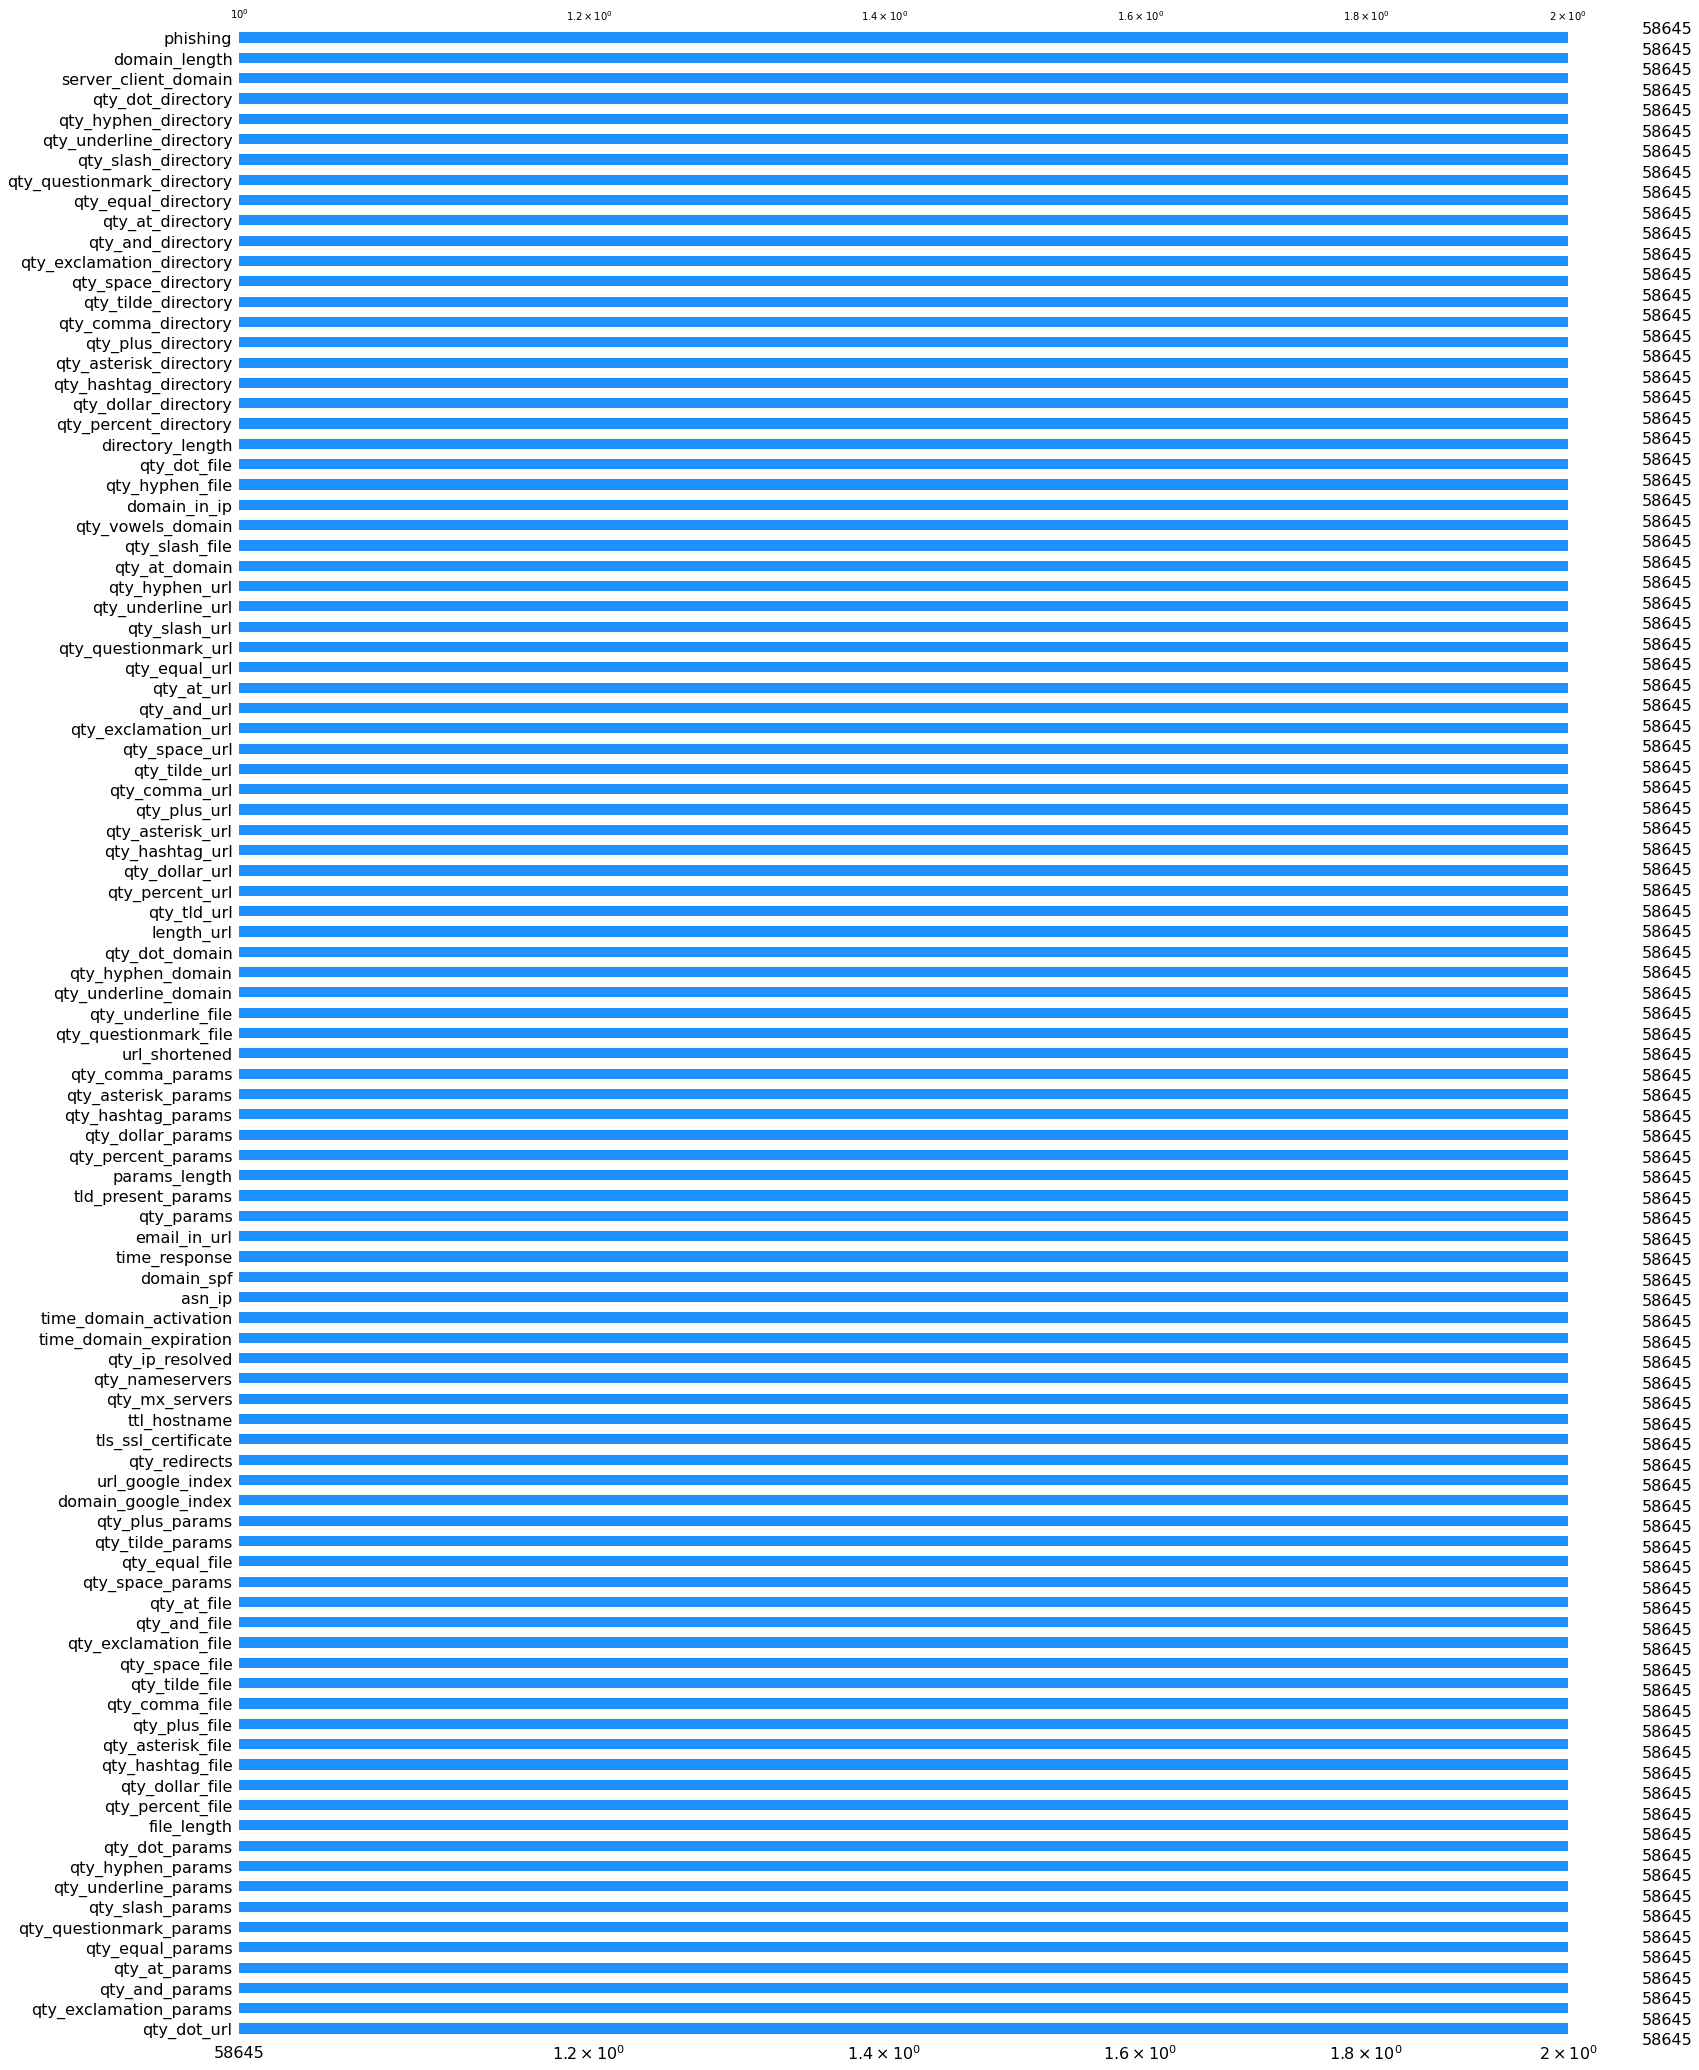

In [12]:
# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending',log=True)

In [13]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [14]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

1653

In [15]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()

qty_dot_url                   56992
qty_hyphen_url                56992
qty_underline_url             56992
qty_slash_url                 56992
qty_questionmark_url          56992
qty_equal_url                 56992
qty_at_url                    56992
qty_and_url                   56992
qty_exclamation_url           56992
qty_space_url                 56992
qty_tilde_url                 56992
qty_comma_url                 56992
qty_plus_url                  56992
qty_asterisk_url              56992
qty_hashtag_url               56992
qty_dollar_url                56992
qty_percent_url               56992
qty_tld_url                   56992
length_url                    56992
qty_dot_domain                56992
qty_hyphen_domain             56992
qty_underline_domain          56992
qty_at_domain                 56992
qty_vowels_domain             56992
domain_length                 56992
domain_in_ip                  56992
server_client_domain          56992
qty_dot_directory           

In [16]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [17]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

Streaming output truncated to the last 5000 lines.
 7723     0.000018
 5317     0.000018
 9864     0.000018
 10905    0.000018
 1458     0.000018
 13851    0.000018
 3991     0.000018
 9232     0.000018
 7546     0.000018
 6002     0.000018
 21326    0.000018
 8280     0.000018
 12436    0.000018
 14013    0.000018
 6876     0.000018
 13315    0.000018
 11810    0.000018
 4829     0.000018
 12222    0.000018
 15396    0.000018
 11689    0.000018
 9002     0.000018
 13990    0.000018
 8796     0.000018
 2154     0.000018
 2693     0.000018
 1404     0.000018
 40000    0.000018
 9064     0.000018
 2817     0.000018
 2156     0.000018
 15898    0.000018
 7680     0.000018
 5241     0.000018
 15493    0.000018
 3420     0.000018
 11189    0.000018
 14750    0.000018
 7217     0.000018
 12626    0.000018
 13698    0.000018
 16296    0.000018
 339      0.000018
 2599     0.000018
 9084     0.000018
 13359    0.000018
 2908     0.000018
 14953    0.000018
 9324     0.000018
 12664    0.000018

Removing the existing -1's and replacing with NAN in order to replace the values using different imputers.

In [18]:
for i,j in cols.items():
    if j>=0.8:
        dataset.drop(i,inplace=True,axis=1)

df_imp=dataset.replace(to_replace = -1,value =np.nan)

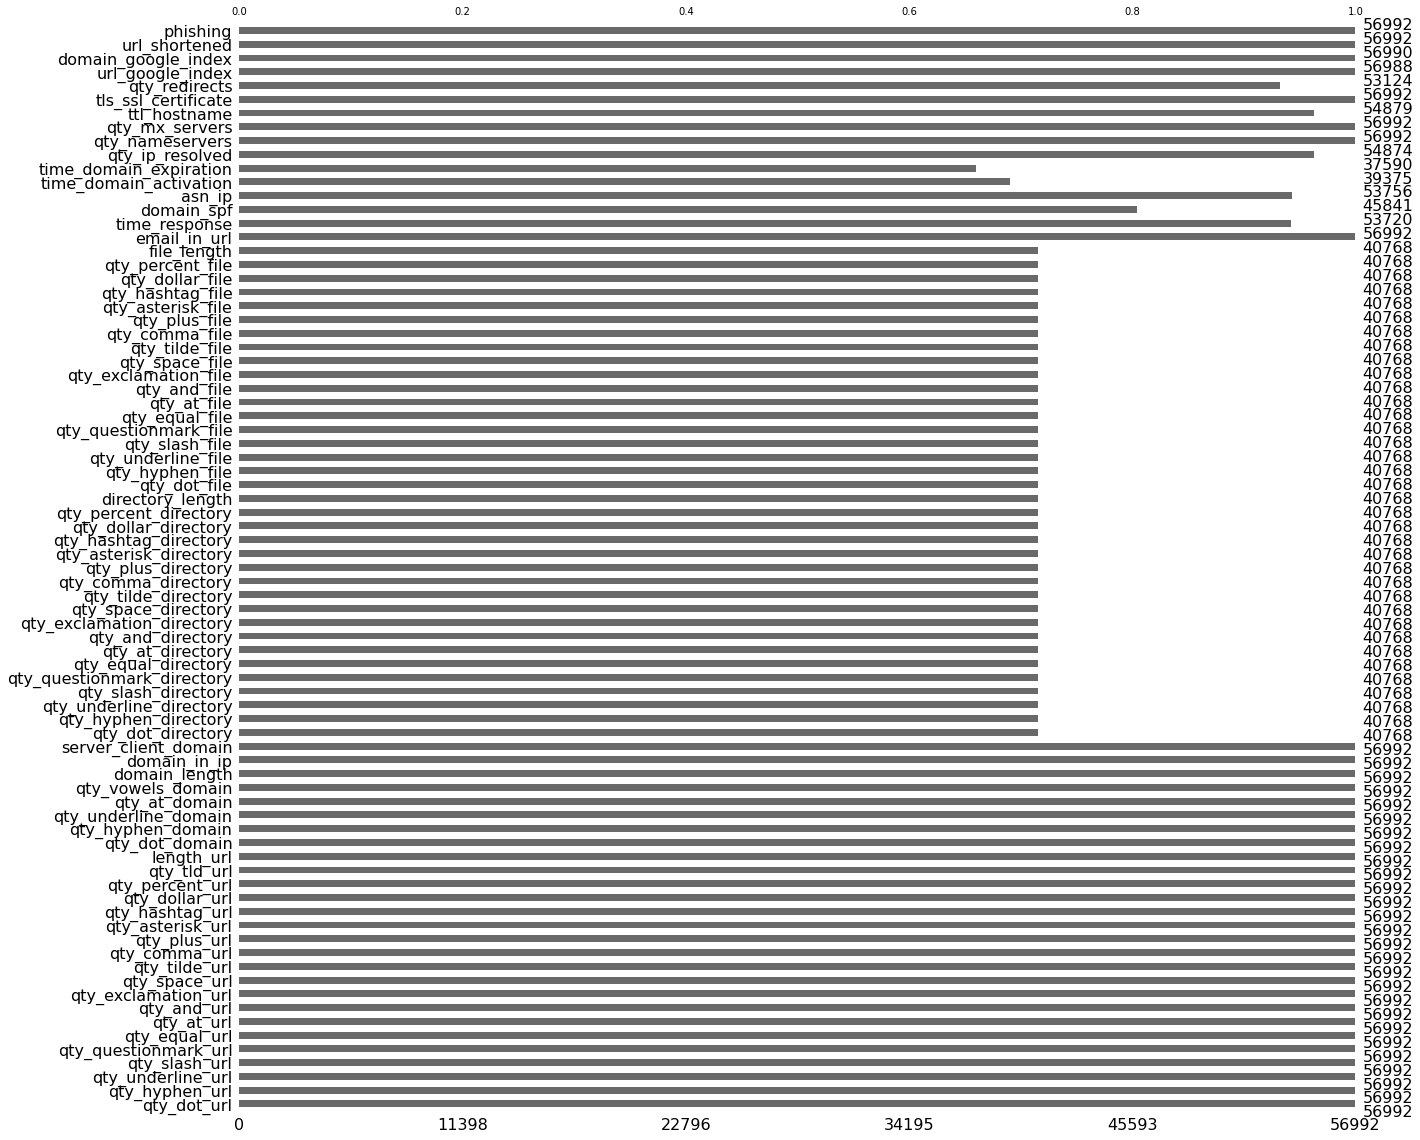

In [19]:
##Visualization of Missing Data using missingno lib.

msno.bar(df_imp,figsize=(20,20))

In [20]:
df_imp

In [21]:
df_imp.isnull().sum()

qty_dot_url                       0
qty_hyphen_url                    0
qty_underline_url                 0
qty_slash_url                     0
qty_questionmark_url              0
qty_equal_url                     0
qty_at_url                        0
qty_and_url                       0
qty_exclamation_url               0
qty_space_url                     0
qty_tilde_url                     0
qty_comma_url                     0
qty_plus_url                      0
qty_asterisk_url                  0
qty_hashtag_url                   0
qty_dollar_url                    0
qty_percent_url                   0
qty_tld_url                       0
length_url                        0
qty_dot_domain                    0
qty_hyphen_domain                 0
qty_underline_domain              0
qty_at_domain                     0
qty_vowels_domain                 0
domain_length                     0
domain_in_ip                      0
server_client_domain              0
qty_dot_directory           

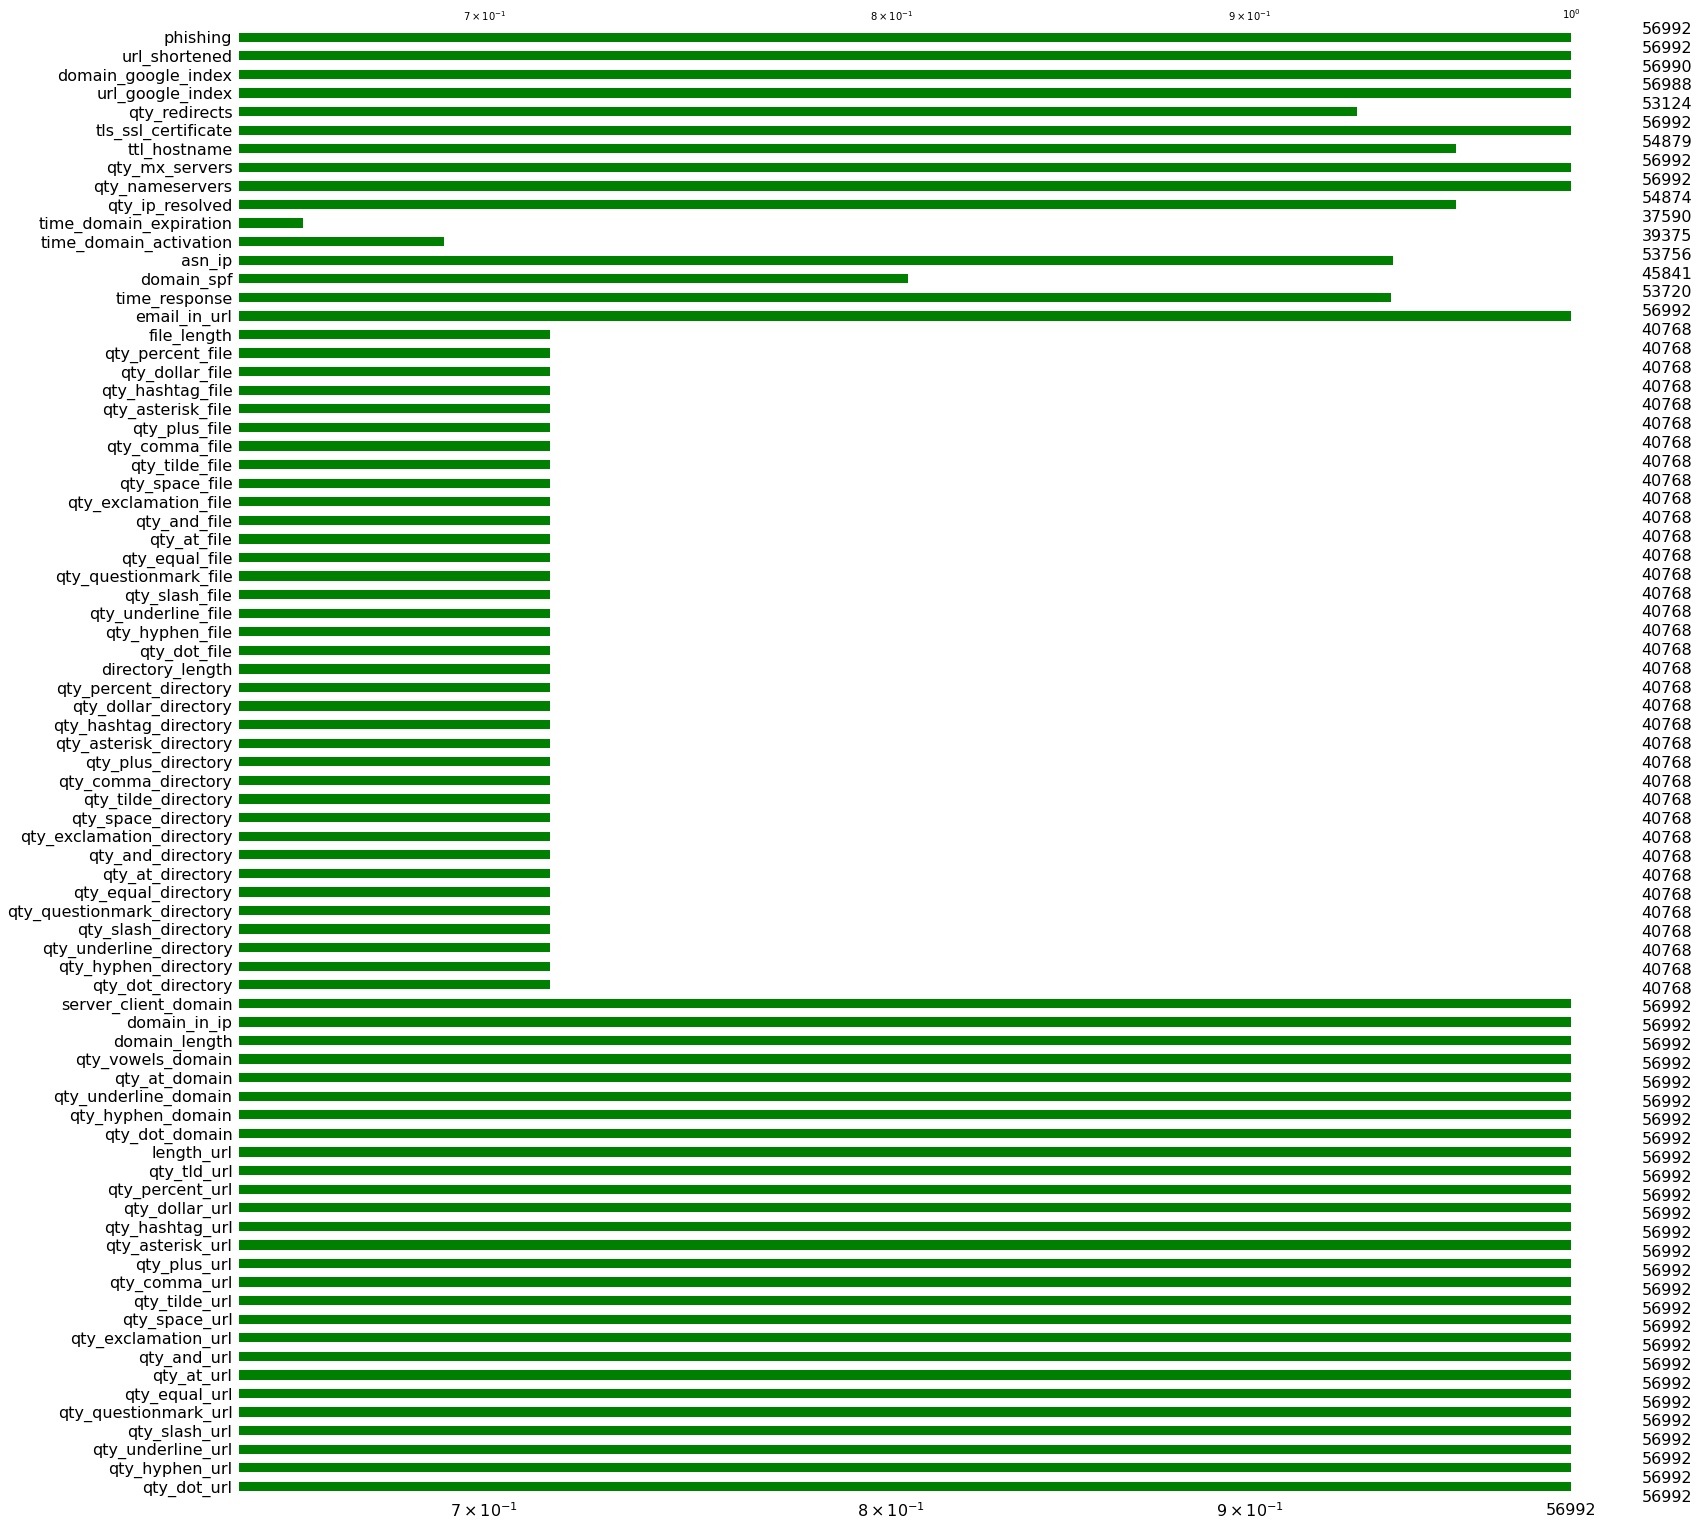

In [22]:
# visualizing the nullity by column
msno.bar(df_imp, log = True, color = 'g');

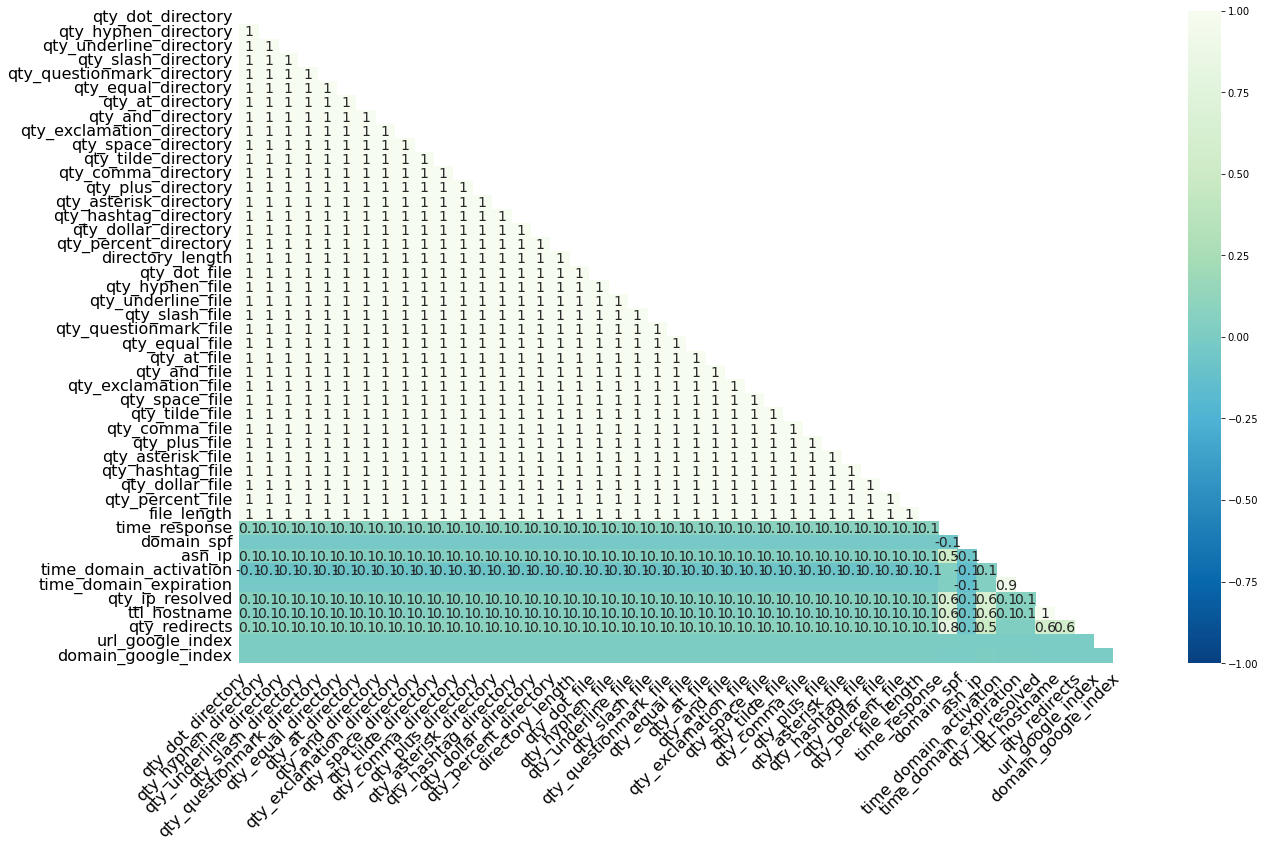

In [23]:
msno.heatmap(df_imp,  cmap='GnBu_r');

In [24]:
df_imp.isnull().sum()

qty_dot_url                       0
qty_hyphen_url                    0
qty_underline_url                 0
qty_slash_url                     0
qty_questionmark_url              0
qty_equal_url                     0
qty_at_url                        0
qty_and_url                       0
qty_exclamation_url               0
qty_space_url                     0
qty_tilde_url                     0
qty_comma_url                     0
qty_plus_url                      0
qty_asterisk_url                  0
qty_hashtag_url                   0
qty_dollar_url                    0
qty_percent_url                   0
qty_tld_url                       0
length_url                        0
qty_dot_domain                    0
qty_hyphen_domain                 0
qty_underline_domain              0
qty_at_domain                     0
qty_vowels_domain                 0
domain_length                     0
domain_in_ip                      0
server_client_domain              0
qty_dot_directory           

Having a missing value in a machine learning model is considered very inefficient and hazardous because of the following reasons: Reduces the efficiency of the ML model. Affects the overall distribution of data values. It leads to a biased effect in the estimation of the ML model. Therefore, Now We impute the data with different imputation techiniques which we later might use it for model training. The different imputation techniques which we can use are Mean, Mode, Median, KNN Imputation.

Mean Imputation

In [25]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape 

(56992, 79)

In [26]:
mean_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.00000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,0.005018,0.001965,0.004229,0.007054,0.000790,0.002948,0.165532,1.070045,45.355769,1.799270,0.134422,0.000298,0.000018,5.455274,18.101067,0.003299,0.003597,0.456584,0.377698,0.125319,2.687892,0.0,0.015036,0.007359,0.009812,0.003532,0.001717,0.006893,0.001030,0.00233,0.008046,0.0,0.002845,0.114109,24.471203,0.361092,0.125687,0.054283,0.0,0.0,0.003581,0.000638,0.003091,0.002257,0.000932,0.000638,0.000711,0.001668,0.002551,0.0,0.0,0.080872,7.088525,0.028162,0.939236,0.204686,36120.794423,3730.277257,455.045278,1.250337,2.812447,1.669620,5400.749522,0.515757,0.438804,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,0.097391,0.080114,0.137914,0.376187,0.076893,0.124368,2.145455,0.308512,54.909963,0.787236,0.467902,0.020087,0.004189,2.712907,7.253478,0.057340,0.059868,0.657548,1.072009,0.483860,1.528282,0.0,0.129231,0.284714,0.237109,0.074873,0.082923,0.096895,0.040169,0.11073,0.357244,0.0,0.114232,1.778752,25.769504,0.444047,0.712329,0.372194,0.0,0.0,0.062339,0.022159,0.048780,0.043085,0.059530,0.031342,0.036272,0.099646,0.271720,0.0,0.0,1.664750,16.151478,0.165437,1.498923,0.361857,50063.728842,2211.438991,525.360398,0.743877,1.374398,1.722182,7078.351722,0.499756,0.708799,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000

In [27]:
mean_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

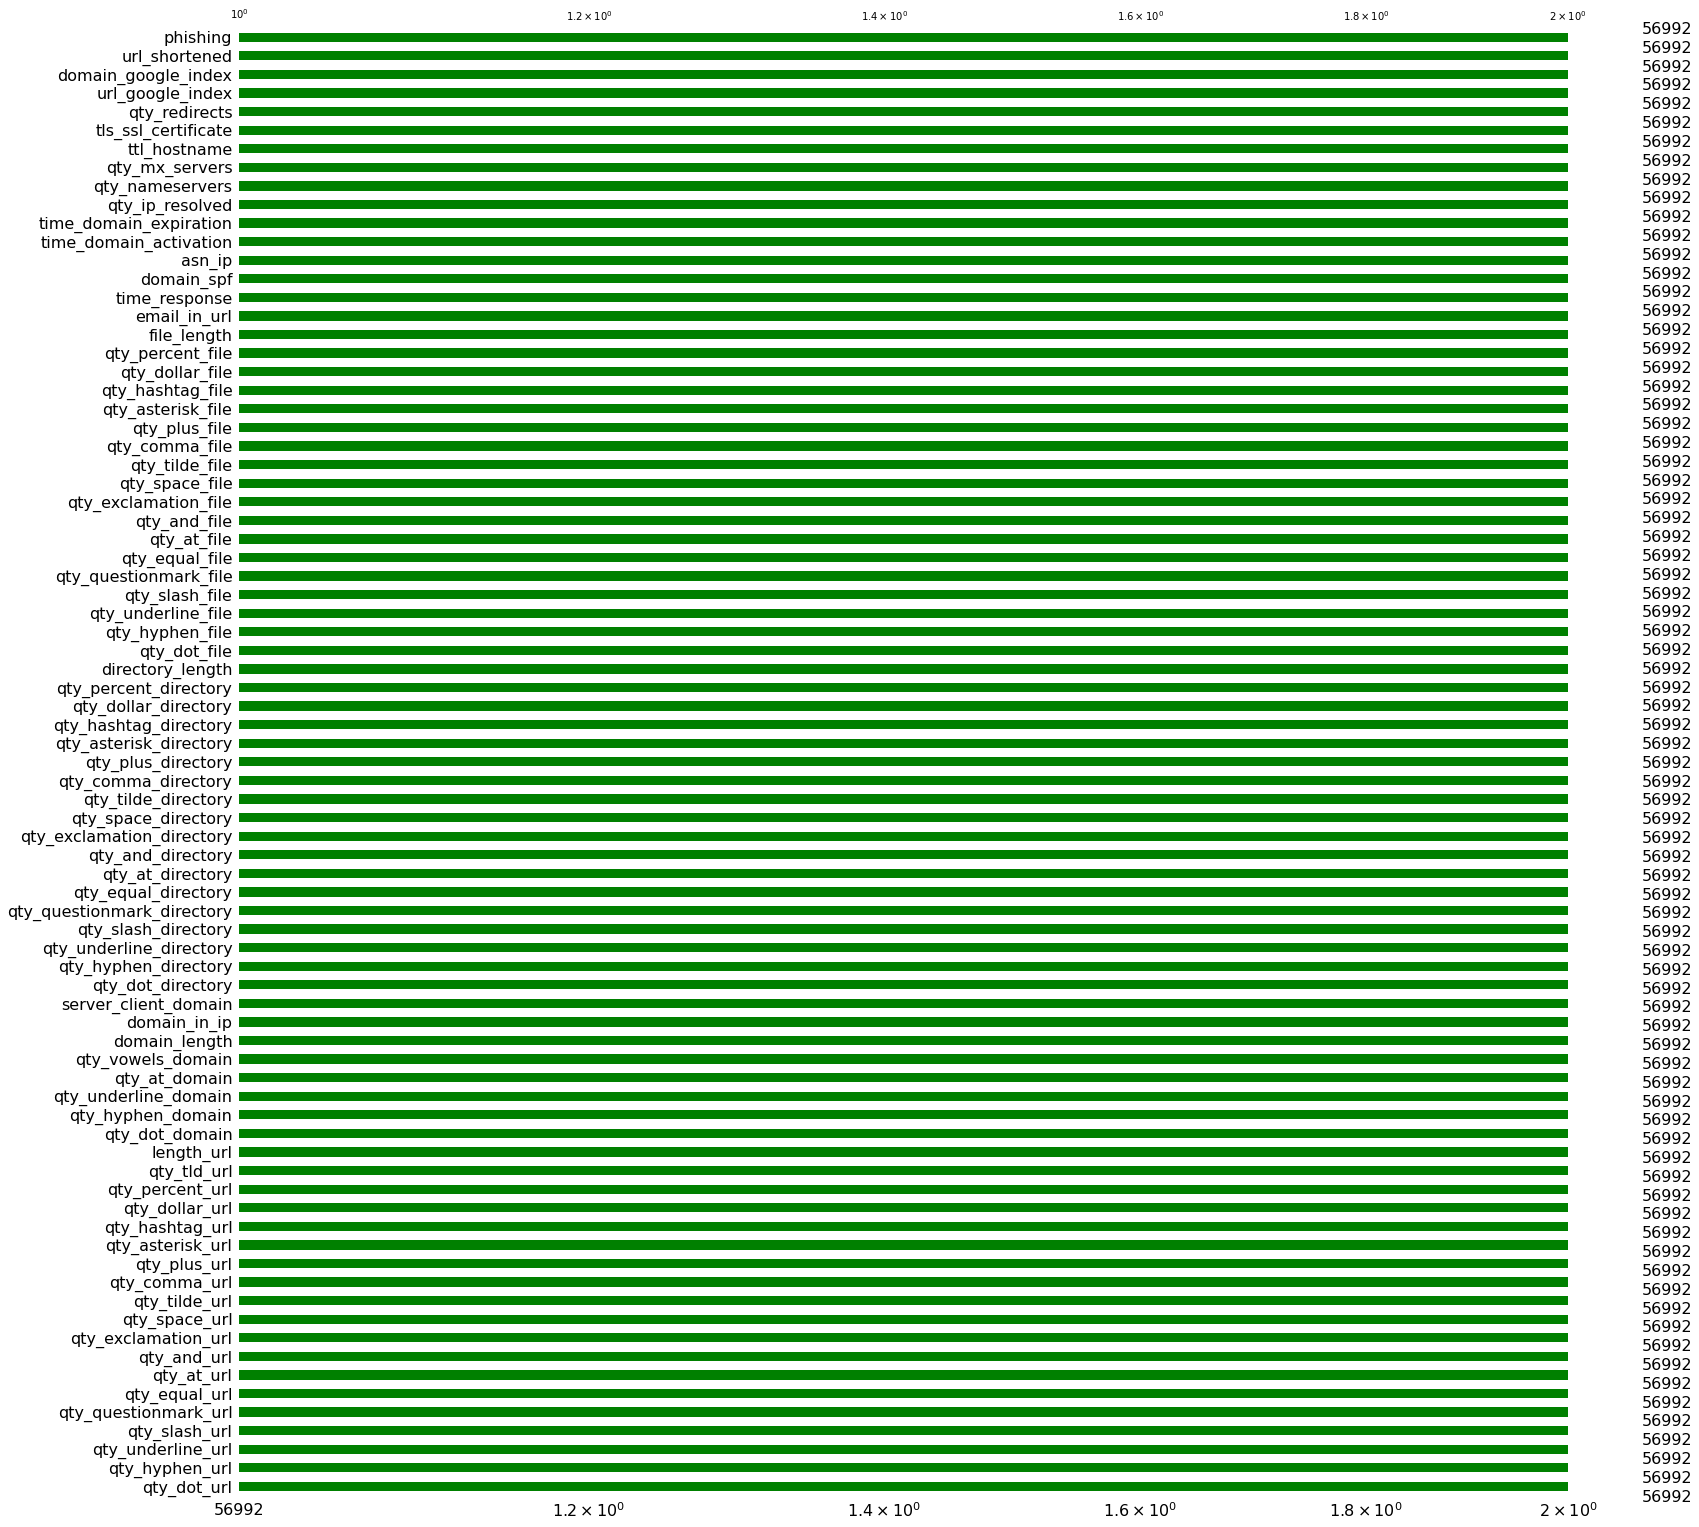

In [28]:
msno.bar(mean_imputed_df, log = True, color = 'g');

Mode Imputation

In [29]:
imp_mode = SimpleImputer( strategy='most_frequent')
imp_mode.fit(df_imp)
mostFreq_imputed_df = imp_mode.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(56992, 79)

In [30]:
mostFreq_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.00000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,0.005018,0.001965,0.004229,0.007054,0.000790,0.002948,0.165532,1.070045,45.355769,1.799270,0.134422,0.000298,0.000018,5.455274,18.101067,0.003299,0.003597,0.326607,0.270178,0.089644,2.207398,0.0,0.010756,0.005264,0.007019,0.002527,0.001228,0.004931,0.000737,0.001667,0.005755,0.0,0.002035,0.081625,17.789620,0.258299,0.089907,0.038830,0.0,0.0,0.002562,0.000456,0.002211,0.001614,0.000667,0.000456,0.000509,0.001193,0.001825,0.0,0.0,0.05785,5.070624,0.028162,0.892066,0.164637,34827.019319,5006.521442,345.410198,1.241034,2.812447,1.669620,5211.600225,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,0.097391,0.080114,0.137914,0.376187,0.076893,0.124368,2.145455,0.308512,54.909963,0.787236,0.467902,0.020087,0.004189,2.712907,7.253478,0.057340,0.059868,0.689073,1.085473,0.487153,1.707572,0.0,0.129409,0.284733,0.237150,0.074890,0.082926,0.096944,0.040171,0.110735,0.357262,0.0,0.114239,1.779497,27.861273,0.473001,0.714584,0.372999,0.0,0.0,0.062360,0.022161,0.048800,0.043097,0.059531,0.031343,0.036273,0.099649,0.271722,0.0,0.0,1.66515,16.465189,0.165437,1.511059,0.370856,50340.672155,2920.785076,547.075466,0.745382,1.374398,1.722182,7143.689122,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000

In [31]:
mostFreq_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

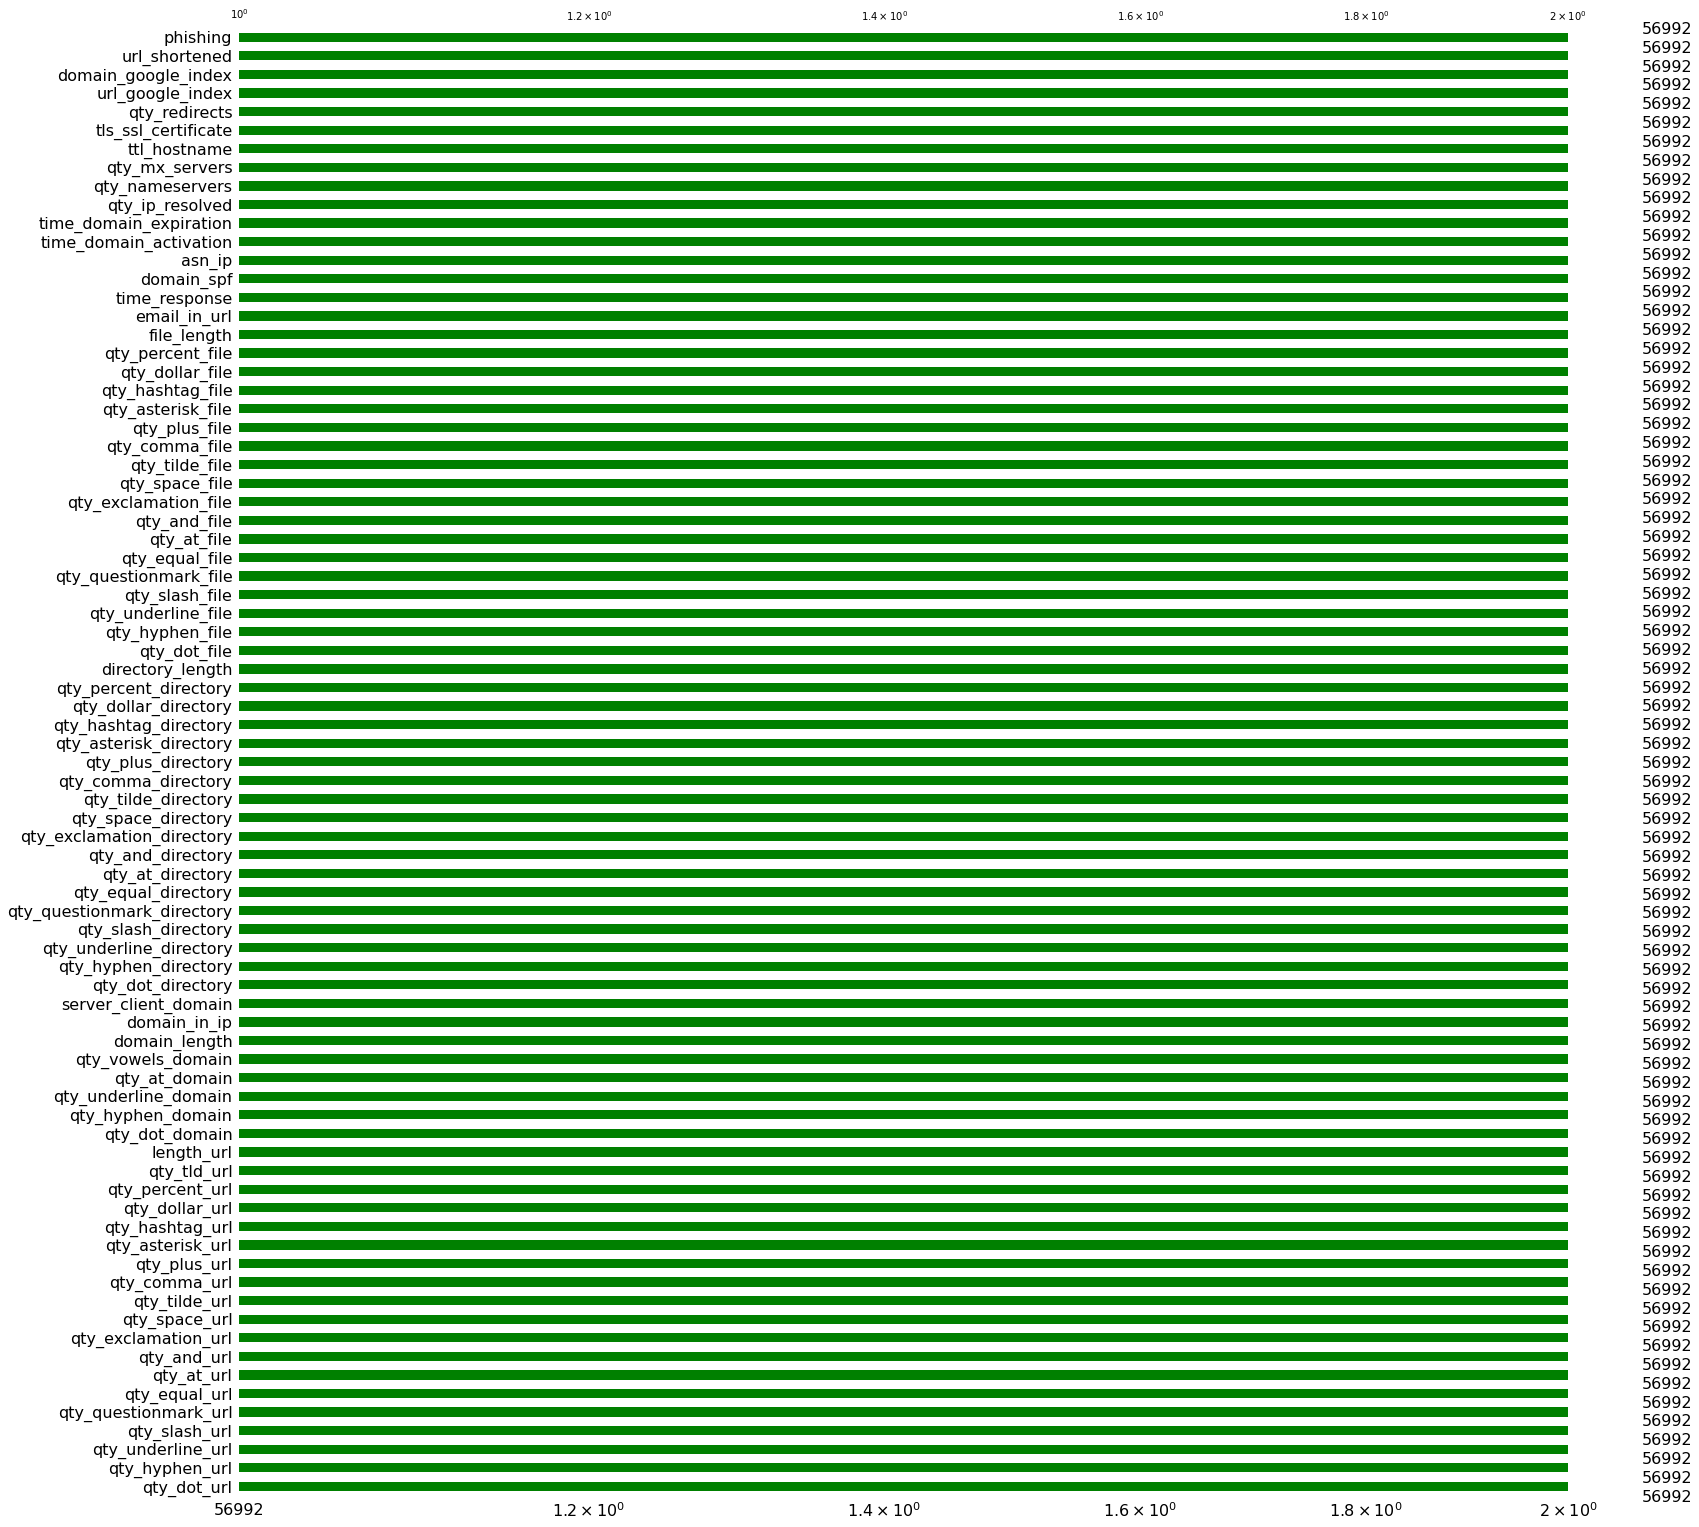

In [32]:
msno.bar(mostFreq_imputed_df, log = True, color = 'g');

Mode Imputation

In [33]:
imp_median = SimpleImputer( strategy='median')
imp_median.fit(df_imp)
median_imputed_df = imp_median.transform(df_imp)
median_imputed_df = pd.DataFrame(median_imputed_df,columns = df_imp.columns)
median_imputed_df.shape

(56992, 79)

In [34]:
median_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.0,56992.0,56992.00000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,0.005018,0.001965,0.004229,0.007054,0.000790,0.002948,0.165532,1.070045,45.355769,1.799270,0.134422,0.000298,0.000018,5.455274,18.101067,0.003299,0.003597,0.326607,0.270178,0.089644,2.492069,0.0,0.010756,0.005264,0.007019,0.002527,0.001228,0.004931,0.000737,0.001667,0.005755,0.0,0.002035,0.081625,22.629036,0.258299,0.089907,0.038830,0.0,0.0,0.002562,0.000456,0.002211,0.001614,0.000667,0.000456,0.000509,0.001193,0.001825,0.0,0.0,0.05785,5.924639,0.028162,0.912712,0.164637,35377.670778,3593.872473,388.645284,1.241034,2.812447,1.669620,5267.139142,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,0.097391,0.080114,0.137914,0.376187,0.076893,0.124368,2.145455,0.308512,54.909963,0.787236,0.467902,0.020087,0.004189,2.712907,7.253478,0.057340,0.059868,0.689073,1.085473,0.487153,1.559489,0.0,0.129409,0.284733,0.237150,0.074890,0.082926,0.096944,0.040171,0.110735,0.357262,0.0,0.114239,1.779497,25.934435,0.473001,0.714584,0.372999,0.0,0.0,0.062360,0.022161,0.048800,0.043097,0.059531,0.031343,0.036273,0.099649,0.271722,0.0,0.0,1.66515,16.256514,0.165437,1.502771,0.370856,50155.266157,2220.821741,533.428293,0.745382,1.374398,1.722182,7111.027903,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000

In [35]:
median_imputed_df.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
qty_vowels_domain             0
domain_length                 0
domain_in_ip                  0
server_client_domain          0
qty_dot_directory             0
qty_hyphen_directory          0
qty_underline_directory       0
qty_slash_directory           0
qty_ques

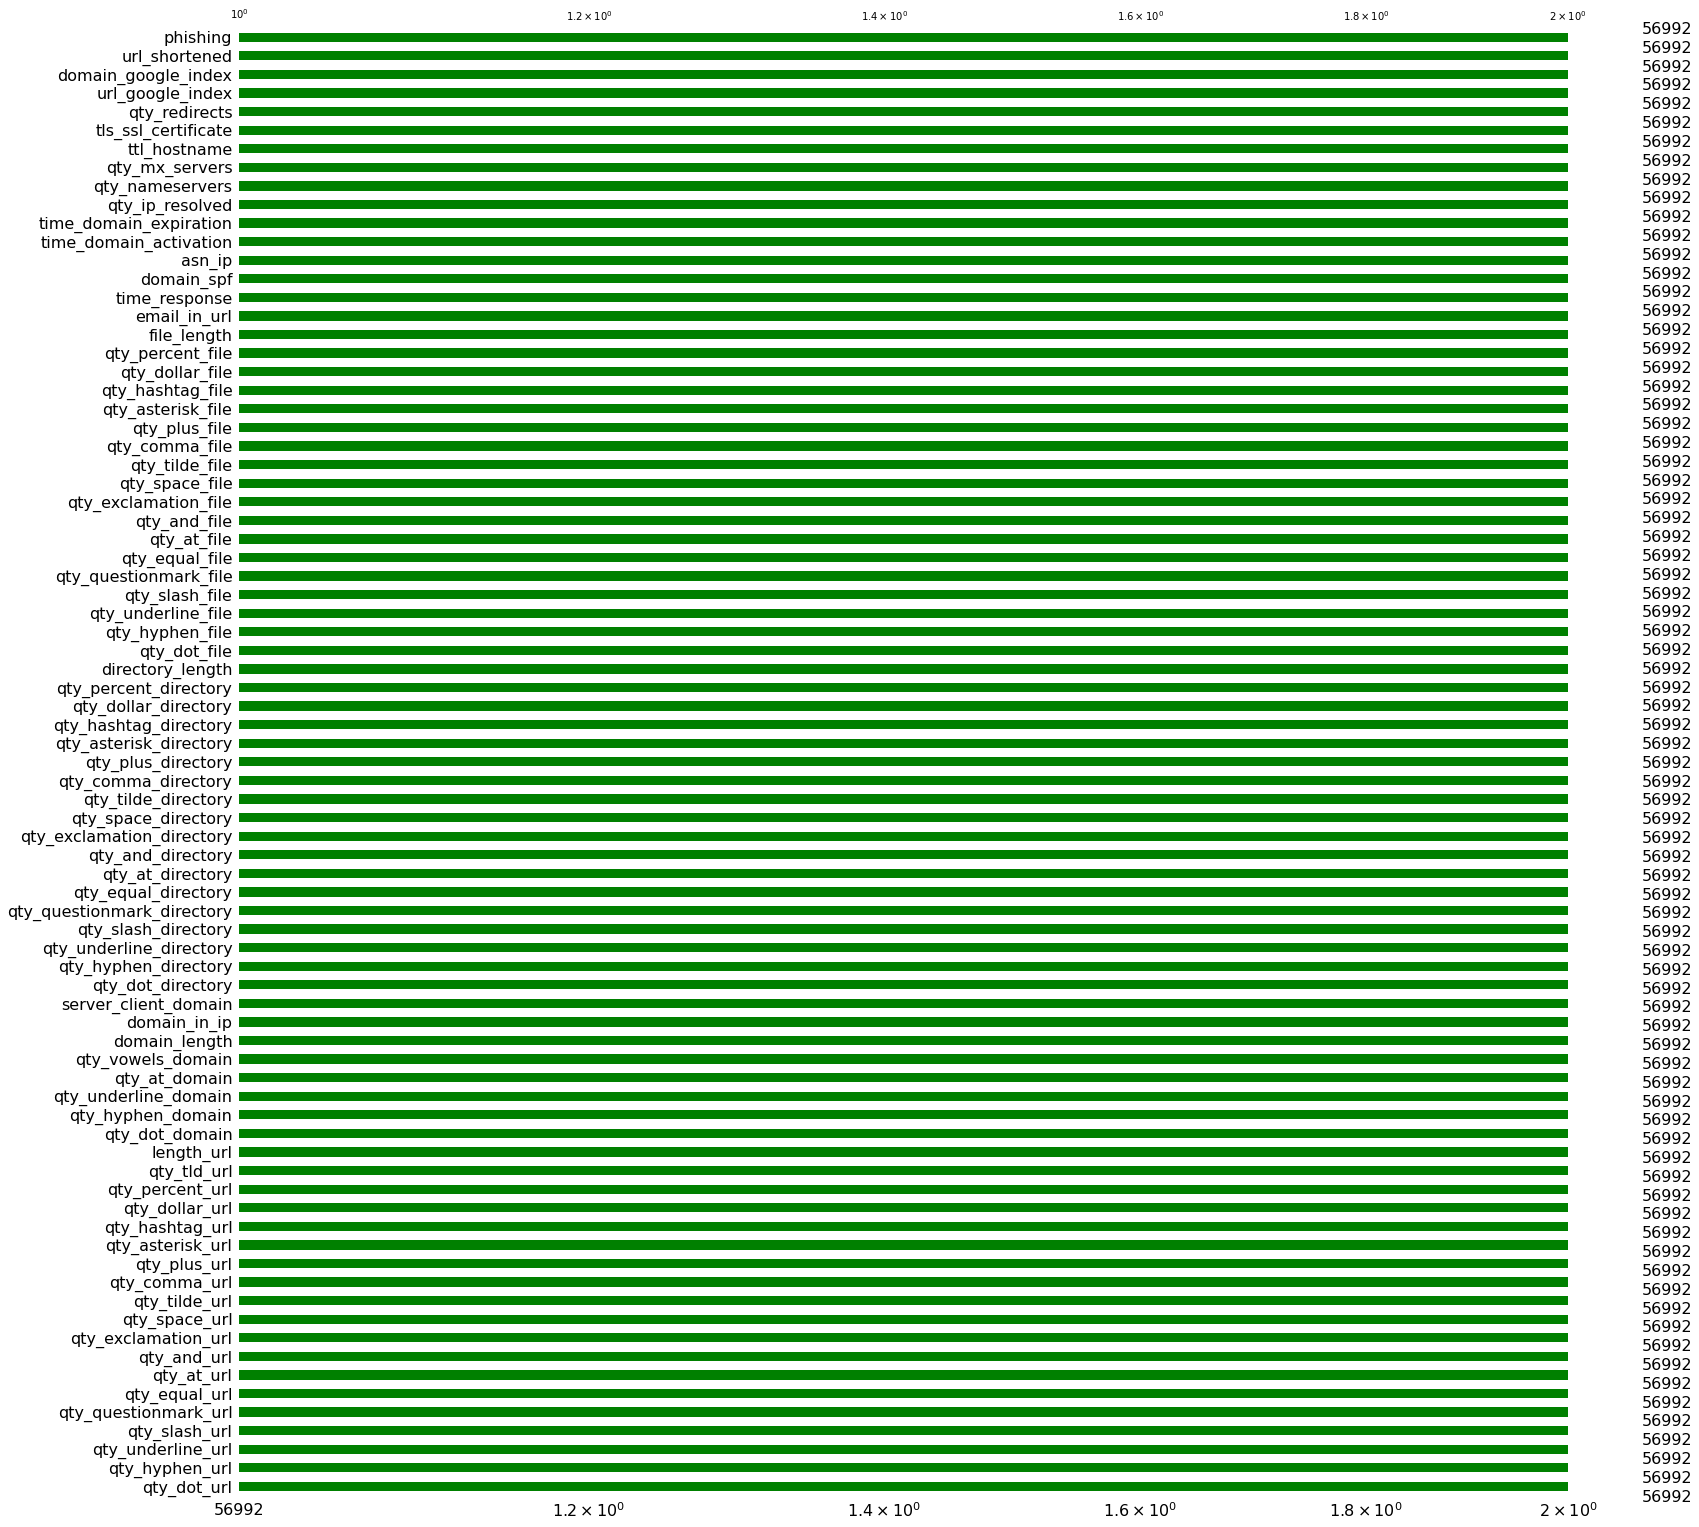

In [36]:
msno.bar(median_imputed_df, log = True, color = 'g');

KNN Imputation

In [37]:
# import sklearn.neighbors._base
# import sys

# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#using KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=7)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [38]:
knn_imputed_df

In [39]:
# If any features have low variance, they may not contribute in the model. If any of them exists we try to remove them.

In [40]:
try:
    from sklearn.feature_selection import VarianceThreshold
except:
    pass  # it will catch any exception here

In [41]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(knn_imputed_df)
variance_threshold.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[variance_threshold.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

No of columns with 0 variance: 6
['qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file']


(56992, 73)

In [42]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

0.000000    46841
1.000000     9392
0.142857      579
0.285714       93
0.857143       34
0.428571       32
0.571429       11
0.714286       10
Name: domain_spf, dtype: int64
0.0    47545
1.0     9447
Name: domain_spf, dtype: int64


Dividing into the numerical columns and categorial columns for better analysis


In [43]:
num_cols=[]
cat_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        cat_cols.append(i)
    else:
        num_cols.append(i)
        

cat_cols.remove('qty_at_domain')
num_cols.append('qty_at_domain')

print("categorical columns: \n",cat_cols)
print("******************************")
print("Numerical columns: \n",num_cols) 

categorical columns: 
 ['domain_in_ip', 'server_client_domain', 'email_in_url', 'domain_spf', 'tls_ssl_certificate', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']
******************************
Numerical columns: 
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_dire

In [44]:
knn_imputed_df.to_csv("knn_imputed_dataset.csv",index=False)

In [45]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

In [46]:
# Plotting all the categorical columns to see how balanced they are


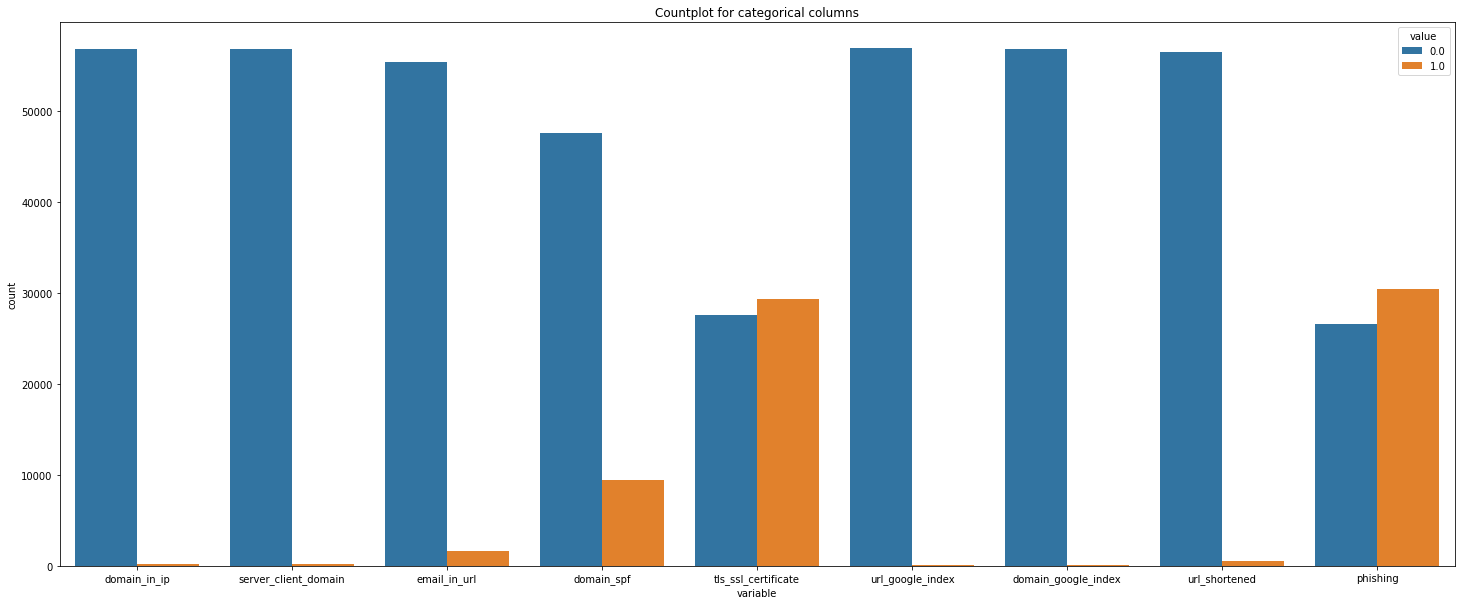

In [47]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,cat_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

In [48]:
df_imp.skew(axis = 0, skipna = True)

qty_dot_url                     4.705857
qty_hyphen_url                  6.748085
qty_underline_url              10.326923
qty_slash_url                   1.608823
qty_questionmark_url           19.537852
qty_equal_url                   5.914453
qty_at_url                     73.861116
qty_and_url                     7.675992
qty_exclamation_url            52.177702
qty_space_url                  78.789030
qty_tilde_url                  29.553968
qty_comma_url                  76.232698
qty_plus_url                   70.996036
qty_asterisk_url               96.466983
qty_hashtag_url               129.999092
qty_dollar_url                 57.013212
qty_percent_url                34.553374
qty_tld_url                     5.170564
length_url                     12.431587
qty_dot_domain                  2.969367
qty_hyphen_domain               5.880011
qty_underline_domain           75.732603
qty_at_domain                 238.729973
qty_vowels_domain               1.716894
domain_length   

In [49]:
###Analyzing the data now
##i) First on mean imputed data
##ii)then on KNN Imputed Data


In [50]:
# I) Analysis on Mean Imputed data

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = mean_imputed_df.drop( columns='phishing')
Y = mean_imputed_df['phishing']

In [52]:
# Spliting the data into training(70%) and test sets(30%)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [54]:
# Using XGBoost Model on Median imputed data training for feature importance 

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [56]:
# Tuning 

In [57]:
from sklearn.model_selection import RandomizedSearchCV


param = {
    # Parameters that will be used
    'max_depth':[int(x) for x in np.linspace(start=5, stop=20, num=1)],
    'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=1)],
    'eta':[0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
    'subsample': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'colsample_bytree': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)]
}

xgb_random_search_CV = RandomizedSearchCV(estimator=xgb,
                                      param_distributions = param,
                                      n_iter = 100,
                                      cv=3,
                                      verbose=2,
                                      random_state=47,
                                      n_jobs=2)

xgb_random_search_CV.fit(X_train, y_train)
print(xgb_random_search_CV.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.1, 'n_estimators': 481, 'min_child_weight': 1, 'max_depth': 5, 'eta': 0.3, 'colsample_bytree': 0.1}


Moving on to feature selection and training the model

In [58]:
xgb = XGBClassifier(subsample = 0.1, n_estimators = 481, min_child_weight = 1,  max_depth = 5,  eta = 0.3, colsample_bytree = 0.1)
xgb.fit(X, Y)

XGBClassifier(colsample_bytree=0.1, eta=0.3, max_depth=5, n_estimators=481,
              subsample=0.1)

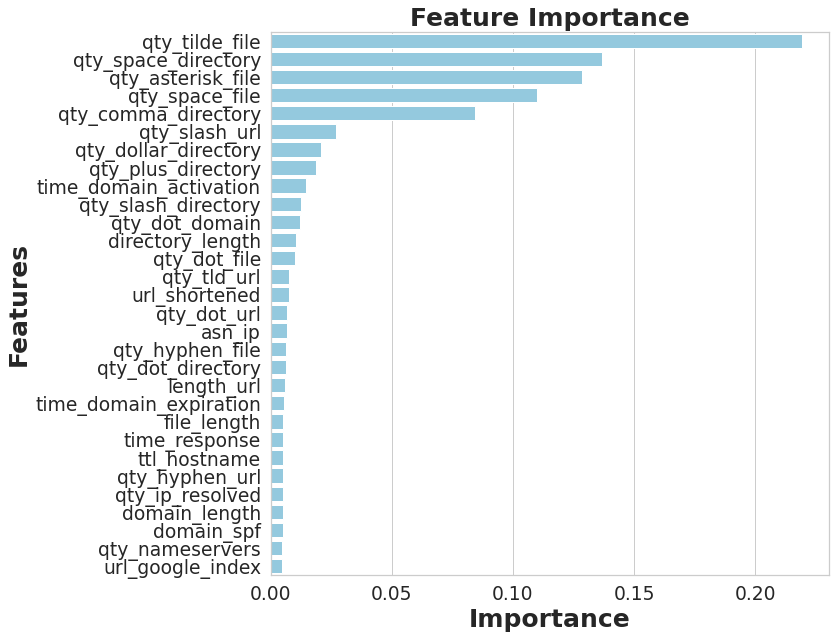

None

In [59]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False).nlargest(30, 'Importance')
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [60]:
display(importances)

,Features,Importance
0,qty_tilde_file,0.219297
1,qty_space_directory,0.136624
2,qty_asterisk_file,0.128487
3,qty_space_file,0.109851
4,qty_comma_directory,0.084184
5,qty_slash_url,0.026884
6,qty_dollar_directory,0.020704
7,qty_plus_directory,0.018907
8,time_domain_activation,0.014478
9,qty_slash_directory,0.012570


Picking Only the Important Features that contribute to getting the result

In [61]:
imp_features_df = X[['qty_space_directory','qty_at_file','qty_asterisk_file','qty_slash_url','qty_exclamation_directory',
                     'qty_dot_domain','domain_google_index','qty_dot_directory','length_url',
                     'qty_percent_file','time_domain_activation','qty_at_url','qty_ip_resolved','qty_exclamation_file'
                     ,'url_shortened']]

In [62]:
imp_features_df.head()

,qty_space_directory,qty_at_file,qty_asterisk_file,qty_slash_url,qty_exclamation_directory,qty_dot_domain,domain_google_index,qty_dot_directory,length_url,qty_percent_file,time_domain_activation,qty_at_url,qty_ip_resolved,qty_exclamation_file,url_shortened
0,0.001717,0.000638,0.002551,0.0,0.003532,2.0,0.0,0.456584,14.0,0.080872,4927.000000,0.0,1.0,0.002257,0.0
1,0.000000,0.000000,0.000000,2.0,0.000000,4.0,0.0,0.000000,38.0,0.000000,8217.000000,0.0,1.0,0.000000,0.0
2,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.000000,24.0,0.000000,258.000000,0.0,1.0,0.000000,0.0
3,0.000000,0.000000,0.000000,3.0,0.000000,2.0,0.0,0.000000,38.0,0.000000,2602.000000,0.0,1.0,0.000000,0.0
4,0.000000,0.000000,0.000000,4.0,0.000000,1.0,0.0,0.000000,46.0,0.000000,3730.277257,0.0,1.0,0.000000,0.0


In [63]:
frames = [imp_features_df, Y]
ref_df = pd.concat(frames,axis = 1)